<a href="https://colab.research.google.com/github/waghvaishnav/Unsupervised-Machine-Learning-Algorithms-and-Techniques-Lab-/blob/main/Hierarchical_Clustering_in_Unsup_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

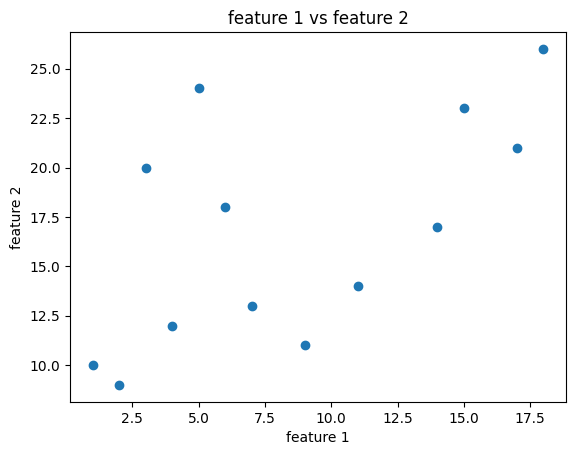

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

x=[1,2,4,5,9,7,14,6,11,3,15,17,18]
y= [10,9,12,24,11,13,17,18,14,20,23,21,26]

plt.scatter(x,y)          #scatter plot
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("feature 1 vs feature 2")
plt.show()


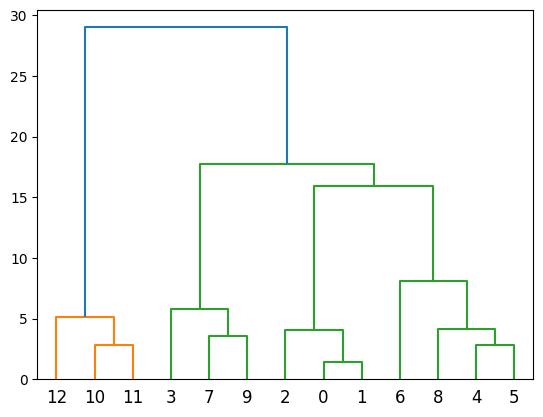

In [8]:
data = list(zip(x,y))

# Dendrogram data
linkage_data = linkage(data,method="ward",metric="euclidean")
dendrogram(linkage_data)

# Fit hierarchical clustering

hierarchical_model = AgglomerativeClustering(n_clusters=2,linkage="ward")
cluster_result = hierarchical_model.fit_predict(data)


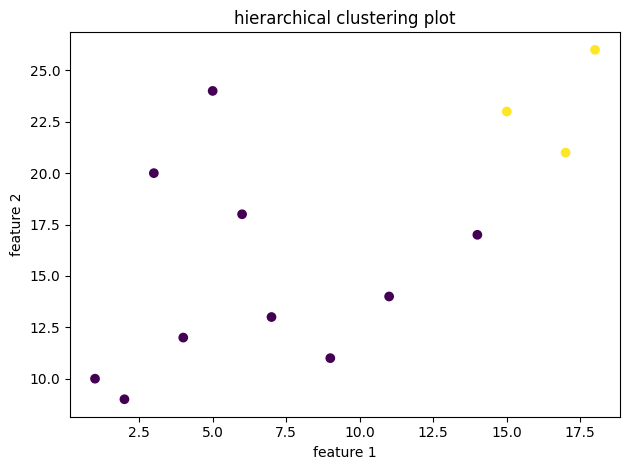

Clustering Result : 

[0 0 0 0 0 0 0 0 0 0 1 1 1]


In [9]:
# Plot scatter with cluster colors
plt.scatter(x,y, c=cluster_result)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("hierarchical clustering plot")
plt.tight_layout()
plt.show()

print("Clustering Result : \n")
print(cluster_result)

code 2 :
dataset used : https://drive.google.com/file/d/1AEMcCWzJ24fc26Q761SEOa1sOsZiJBC5/view?usp=sharing

In [31]:
from google.colab import files
files.upload()

Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis.csv


{'Global_Pollution_Analysis.csv': b"Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)\nHungary,2005,272.7,124.27,51.95,94802.83,158.14,5.3,41.11,37078.88,12.56,42.22,20972.96\nSingapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.2,5.23,137.25,34850.41\nRomania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15\nCook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.8,21837.51\nDjibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.0,39235.12,12.84,186.52,41379.37\nCroatia,2009,151.36,61.07,86.75,58079.8,136.26,33.39,39.49,12191.7,18.14,103.43,35092.93\nCongo,2008,292.31,156.85,36.4,67774.76,199.71,35.29,26.17,9450.05,16.5,182.09,52050.07\nCentral African Republic,2006,209.41

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

df = pd.read_csv("Global_Pollution_Analysis.csv")

In [38]:
df.head(3)

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15


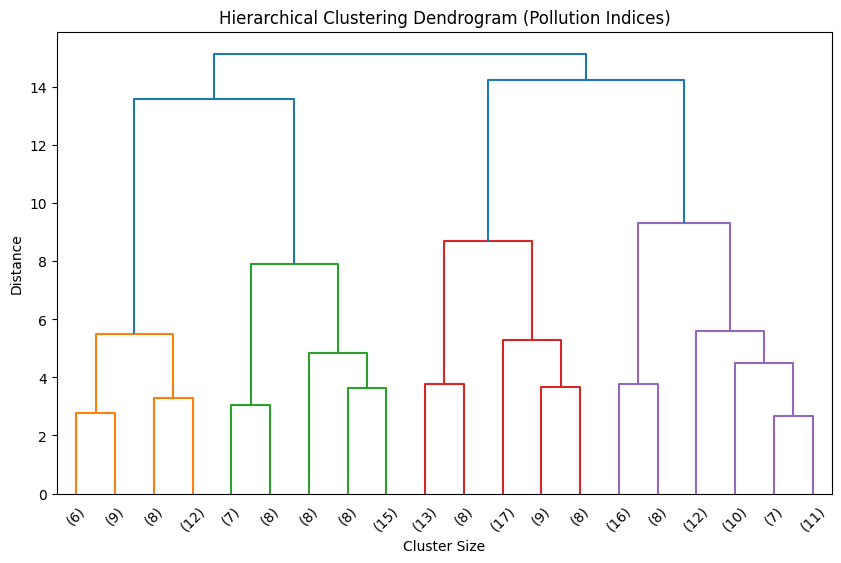

In [43]:
features  = df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]]

scaled_data = StandardScaler().fit_transform(features)

plt.figure(figsize=(10, 6))
linkage_df = linkage(scaled_data,metric="euclidean",method="ward")
dendrogram(linkage_df, truncate_mode="lastp", p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (Pollution Indices)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [61]:
cluster_model = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = cluster_model.fit_predict(scaled_data)
df["cluster"] =labels

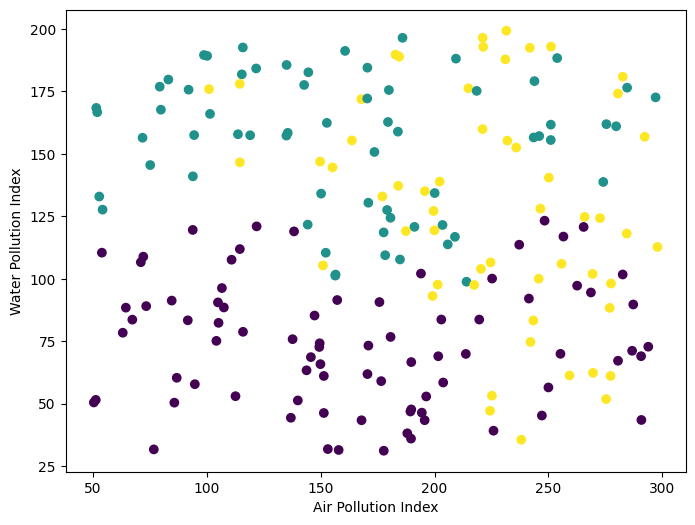

In [63]:
#visualization of scatter plot :
plt.figure(figsize=(8, 6))
plt.scatter(df["Air_Pollution_Index"],df['Water_Pollution_Index'],c=labels)
plt.xlabel("Air Pollution Index")
plt.ylabel("Water Pollution Index")
plt.show()

In [64]:
df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index","cluster"]].head(10)

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,cluster
0,272.70,124.27,51.95,2
1,86.72,60.34,117.22,0
2,91.59,83.36,121.72,0
3,280.61,67.16,93.58,0
4,179.16,127.53,121.55,1
5,151.36,61.07,86.75,0
6,292.31,156.85,36.40,2
7,209.41,188.14,133.50,1
8,269.63,62.33,71.19,2
9,231.99,155.31,44.99,2
